# **Inital Capstone Data Upload and EDA**

### **Author:** Mark Shumka

### **Contact:** markshumka@gmail.com

### **Date:** October 20, 2023

## **Introduction** ##

In this notebook, we will upload and begin to explore our dataset(s). First, let's set up our standard modules.

## **Table of Contents** ##

In [154]:
# Import standard data science & visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Our first dataset comes from [Moneypuck.com](moneypuck.com). It contains Advanced Stats for all NHL games from the 2008-09 season to the 2022-23 season, aggregated at a team level.

In [155]:
mp_df = pd.read_csv('all_teams.csv')

In [156]:
mp_df.shape

(190300, 111)

In [157]:
# .info won't show the individual column details unless we include the number of columns to show. There are 111 columns in this dataset.
mp_df.info(111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190300 entries, 0 to 190299
Data columns (total 111 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    team                                       object 
 1    season                                     int64  
 2    name                                       object 
 3    gameId                                     int64  
 4    playerTeam                                 object 
 5    opposingTeam                               object 
 6    home_or_away                               object 
 7    gameDate                                   int64  
 8    position                                   object 
 9    situation                                  object 
 10   xGoalsPercentage                           float64
 11   corsiPercentage                            float64
 12   fenwickPercentage                          float64
 13   iceTime                    

In [158]:
mp_df.head()

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,other,...,1.0,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0
1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,...,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
2,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on5,...,20.0,19.369,3.0,0.237,0.168,0.168,1.862,1.777,1.665,0
3,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,4on5,...,9.0,9.000,1.0,0.124,0.000,0.000,0.795,0.795,0.789,0
4,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on4,...,1.0,1.000,1.0,0.019,0.000,0.000,0.224,0.224,0.224,0


Each row in the dataframe represents team statistics for a specific game. We can see that there are columns indicating the team, as well as the opposing team they faced in that game. There is also a unique gameID column that follows a standard format to identify each game separately. Each gameID has two separate sets of rows, one set for each team. However, there are multiple rows for each team/game combination. This is because there are rows for different game situations (listed in the 'situation' column), specifically around when one team or the other has a penalty, leaving them shorthanded. In fact, there are 5 rows for each team/game combination. For the purposes of predicting future game outcomes, we will only need the total statistics for each game, as it would be difficult to accurately predict the penalties that a team takes in a given match. As a result, we can filter the dataframe down to only include rows where the value in the situation column is "all".

In [159]:
# Filter mp_df to select only rows where 'situation' is equal to 'all'
filtered_mp_df = mp_df[mp_df['situation'] == 'all']

In [160]:
# Check to ensure that the new dataframe only contains rows where `situation` = 'all'
filtered_mp_df.head()

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,...,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
6,NYR,2008,NYR,2008020003,NYR,T.B,HOME,20081005,Team Level,all,...,32.0,31.984,5.0,0.241,0.000,0.000,1.091,1.117,1.091,0
11,NYR,2008,NYR,2008020010,NYR,CHI,HOME,20081010,Team Level,all,...,45.0,43.911,3.0,0.448,0.407,0.407,2.738,2.751,2.730,0
16,NYR,2008,NYR,2008020019,NYR,PHI,AWAY,20081011,Team Level,all,...,41.0,38.025,4.0,0.504,0.401,0.401,3.123,2.958,2.907,0
21,NYR,2008,NYR,2008020034,NYR,N.J,HOME,20081013,Team Level,all,...,39.0,38.019,3.0,0.383,1.139,1.139,2.698,2.691,2.242,0


In [161]:
# Let's reset the index for now. We can drop it later if necessary.
filtered_mp_df.reset_index()

,index,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,...,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
1,6,NYR,2008,NYR,2008020003,NYR,T.B,HOME,20081005,Team Level,...,32.0,31.984,5.0,0.241,0.000,0.000,1.091,1.117,1.091,0
2,11,NYR,2008,NYR,2008020010,NYR,CHI,HOME,20081010,Team Level,...,45.0,43.911,3.0,0.448,0.407,0.407,2.738,2.751,2.730,0
3,16,NYR,2008,NYR,2008020019,NYR,PHI,AWAY,20081011,Team Level,...,41.0,38.025,4.0,0.504,0.401,0.401,3.123,2.958,2.907,0
4,21,NYR,2008,NYR,2008020034,NYR,N.J,HOME,20081013,Team Level,...,39.0,38.019,3.0,0.383,1.139,1.139,2.698,2.691,2.242,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38055,190276,L.A,2015,L.A,2015030185,L.A,S.J,HOME,20160422,Team Level,...,36.0,39.463,10.0,0.370,0.261,0.261,2.152,2.314,2.307,1
38056,190281,L.A,2017,L.A,2017030171,L.A,VGK,AWAY,20180411,Team Level,...,51.0,52.184,4.0,0.509,0.000,0.000,2.788,2.783,2.733,1
38057,190286,L.A,2017,L.A,2017030172,L.A,VGK,AWAY,20180413,Team Level,...,76.0,75.118,3.0,0.788,0.962,0.962,4.469,4.347,4.234,1
38058,190291,L.A,2017,L.A,2017030173,L.A,VGK,HOME,20180415,Team Level,...,46.0,46.316,6.0,0.506,0.613,0.613,3.051,3.139,3.107,1


In [162]:
# What does the new dataframe look like?
filtered_mp_df.shape

(38060, 111)

In [163]:
print(f'There are {filtered_mp_df.shape[0]} columns and {filtered_mp_df.shape[1]} rows')

There are 38060 columns and 111 rows


Is this the actual number of games played over these seasons? Before I go and find the number of games per season (which has changed for multiple reasons, including strikes, lockouts, and COVID-19) and multiply by the number of teams (which has increased due to the addition of Las Vegas in 2016 and Seattle in 2019), I would like to take a look at the number of games per season in the dataset, to ensure that it's consistent when expected. 

In [164]:
# Count the number of values per season
filtered_mp_df['season'].value_counts()

2021    2802
2022    2800
2018    2716
2017    2710
2013    2646
2015    2642
2014    2638
2009    2636
2010    2636
2016    2634
2011    2632
2008    2628
2019    2424
2020    1904
2012    1612
Name: season, dtype: int64

Oops, it's not consistent. For the majority of the time this dataset comprises, there were 30 teams, each playing 82 games. This works out to 2,460 games, which would be the amount we would expect to see for each season. There's only one possible explanation for the higher number - PLAYOFFS. And revisiting the dataframe info, we see that all the way at the end, the last column is called 'playoffGame', with a value of '1' when it is a playoff game. So this explains the inconsitency in yearly game totals, as the playoffs consist of four rounds of best-of-7 series, which means that the number of games varies depending on results. 

Should we include playoff games in our analysis? It is a commonly-held belief that the regular season is not an accurate predictor of playoff outcome, as the style of game and the officiating change in the playoffs. We will determine whether or not to include the playoffs before beginning our full analysis and modeling (unless there is time to do a separate analysis of the comparability of the regular season and the playoffs).

In [165]:
# Check for null values
filtered_mp_df.isna().sum()

team                                         0
season                                       0
name                                         0
gameId                                       0
playerTeam                                   0
                                            ..
reboundxGoalsAgainst                         0
totalShotCreditAgainst                       0
scoreAdjustedTotalShotCreditAgainst          0
scoreFlurryAdjustedTotalShotCreditAgainst    0
playoffGame                                  0
Length: 111, dtype: int64

In [166]:
# Since that list is long, let's check for null values in each column
columns_with_null = filtered_mp_df.columns[filtered_mp_df.isna().any()]

# Display columns with null values, if any
if not columns_with_null.empty:
    print("Columns with null values:")
    print(columns_with_null)
else:
    print("No columns have null values.")

No columns have null values.


In [167]:
# Check for duplicated rows
filtered_mp_df.duplicated().sum()

0

In [168]:
# Check for duplicated columns
filtered_mp_df.T.duplicated()

team                                         False
season                                       False
name                                          True
gameId                                       False
playerTeam                                    True
                                             ...  
reboundxGoalsAgainst                         False
totalShotCreditAgainst                       False
scoreAdjustedTotalShotCreditAgainst          False
scoreFlurryAdjustedTotalShotCreditAgainst    False
playoffGame                                  False
Length: 111, dtype: bool

In [169]:
# Sort the results to see if there are more than two duplicate
duplicated_rows = filtered_mp_df.T.duplicated()
duplicated_rows.sort_values(ascending=False)

name                                      True
playerTeam                                True
team                                     False
flurryScoreVenueAdjustedxGoalsAgainst    False
playContinuedOutsideZoneAgainst          False
                                         ...  
savedShotsOnGoalFor                      False
playContinuedOutsideZoneFor              False
playContinuedInZoneFor                   False
playStoppedFor                           False
playoffGame                              False
Length: 111, dtype: bool

In [170]:
# Alternatively, we could do the sum of the duplicated result to confirm how many duplicate columns there are
filtered_mp_df.T.duplicated().sum()

2

In [171]:
# Look at the duplicated columns
filtered_mp_df[['team', 'name', 'playerTeam']]

,team,name,playerTeam
1,NYR,NYR,NYR
6,NYR,NYR,NYR
11,NYR,NYR,NYR
16,NYR,NYR,NYR
21,NYR,NYR,NYR
...,...,...,...
190276,L.A,L.A,L.A
190281,L.A,L.A,L.A
190286,L.A,L.A,L.A
190291,L.A,L.A,L.A


Okay, there are three columns that all contain the same information. We can drop two of them. Let's drop `name` and `playerTeam`.

In [172]:
filtered_mp_df = filtered_mp_df.drop(columns=['name', 'playerTeam'])

In [173]:
filtered_mp_df.shape

(38060, 109)

Now we can import our second dataset and examine it before merging them together. It contains the basic statistics for each game published by the NHL itself.

In [174]:
gts_df = pd.read_csv('game_teams_stats.csv')

In [175]:
gts_df.shape

(52610, 17)

We saw that the dataset above contained games beginning in the 2008-09 season. Before we explore this second dataset further. Let's confirm how far back the data goes.

In [176]:
gts_df.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


There is no season or year column in this data to indicate when the games took place, but there is a game_id column, which we learned above includes the season information in the first four digits. Sorting by that column will show us when the data started.

In [177]:
gts_df.sort_values(by='game_id', ascending=True)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
36857,2000020001,21,away,False,OT,Bob Hartley,2.0,28.0,NaN,20.0,10.0,1.0,NaN,NaN,NaN,NaN,left
36858,2000020001,25,home,False,OT,Ken Hitchcock,2.0,21.0,NaN,22.0,9.0,1.0,NaN,NaN,NaN,NaN,left
38303,2000020002,9,away,False,OT,Jacques Martin,4.0,33.0,NaN,20.0,6.0,2.0,NaN,NaN,NaN,NaN,right
38304,2000020002,6,home,False,OT,Pat Burns,4.0,38.0,NaN,12.0,10.0,2.0,NaN,NaN,NaN,NaN,right
36159,2000020003,7,home,True,REG,Lindy Ruff,4.0,30.0,NaN,21.0,3.0,0.0,NaN,NaN,NaN,NaN,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45396,2019040652,90,away,True,tbc,Rick Tocchet,10.0,28.0,0.0,0.0,0.0,0.0,35.0,1.0,6.0,1.0,NaN
45399,2019040653,90,home,True,tbc,Rick Tocchet,5.0,20.0,0.0,0.0,0.0,0.0,62.5,1.0,6.0,2.0,NaN
45398,2019040653,87,away,False,tbc,Bruce Cassidy,4.0,11.0,0.0,0.0,0.0,0.0,37.5,2.0,5.0,2.0,NaN
45392,2019040653,87,away,False,tbc,Bruce Cassidy,4.0,11.0,0.0,0.0,0.0,0.0,37.5,2.0,5.0,2.0,NaN


This peek into the data gives us a few insights. First, the dataset begins in 2000, so we can filter out the first eight seasons of data before merging with the other dataset. Second, it has a lot of null values in the initial rows. Perhaps by excluding these seasons, we will avoid the null values issue. Third, the data only extends through the 2019-20 season. It would be nice to have more current data than that, so I will continue to look for sources for that, but in the meantime, we may limit both datasets to 2008-2020. Finally, there are weird values in the 'settled_in' column in the final rows. We will explore that prior to merging the data.  For now, we can start by filtering out the first eight seasons.

In [178]:
filtered_gts_df = gts_df[gts_df['game_id'] >= 2008000000]

In [179]:
# What does the new dataframe look like?
filtered_gts_df.shape

(35390, 17)

In [180]:
print(f'There are {filtered_gts_df.shape[0]} columns and {filtered_gts_df.shape[1]} rows')

There are 35390 columns and 17 rows


There are fewer rows in this dataframe than the mp_df one above, but that is to be expected since it contains fewer seasons of data.

In [181]:
filtered_gts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35390 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 35390 non-null  int64  
 1   team_id                 35390 non-null  int64  
 2   HoA                     35390 non-null  object 
 3   won                     35390 non-null  bool   
 4   settled_in              35390 non-null  object 
 5   head_coach              35362 non-null  object 
 6   goals                   35382 non-null  float64
 7   shots                   35382 non-null  float64
 8   hits                    35382 non-null  float64
 9   pim                     35382 non-null  float64
 10  powerPlayOpportunities  35382 non-null  float64
 11  powerPlayGoals          35382 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               35382 non-null  float64
 14  takeaways               35382 non-null

It looks like there are some null values. Let's take a closer look.

In [182]:
# Check for null values
filtered_gts_df.isna().sum()

game_id                      0
team_id                      0
HoA                          0
won                          0
settled_in                   0
head_coach                  28
goals                        8
shots                        8
hits                         8
pim                          8
powerPlayOpportunities       8
powerPlayGoals               8
faceOffWinPercentage      4928
giveaways                    8
takeaways                    8
blocked                      8
startRinkSide             1244
dtype: int64

Hmm, those columns with 8 null values look suspicious. Let's look at one of them.

In [183]:
filtered_gts_df[filtered_gts_df['goals'].isna()]

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
40904,2017030185,28,away,False,tbc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40905,2017030185,24,home,False,tbc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40998,2017030326,52,away,False,tbc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40999,2017030326,54,home,False,tbc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41000,2017030327,54,away,False,tbc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41001,2017030327,52,home,False,tbc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41770,2016030217,3,away,False,tbc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41771,2016030217,9,home,False,tbc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Interesting. Those are legitimate game_ids, at least in terms of format. Let's look for one of them in the mp_df dataset.

In [184]:
filtered_mp_df[(filtered_mp_df['gameId'] == 2017030185)]

,team,season,gameId,opposingTeam,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame


No result. After some research, I found this information on the format of game ids:

Game IDs

- will look like this: 2023020001
- The first 4 digits identify the season of the game (ie. 2017 for the 2017-2018 season). Always refer to a season with the starting year. A game played in March 2018 would still have a game ID that starts with 2017
- The next 2 digits give the type of game, where 01 = preseason, 02 = regular season, 03 = playoffs, 04 = all-star
- The final 4 digits identify the specific game number. For regular season and preseason games, this ranges from 0001 to the number of games played. (1353 for seasons with 32 teams (2022 - Present), 1271 for seasons with 31 teams (2017 - 2020) and 1230 for seasons with 30 teams). For playoff games, the 2nd digit of the specific number gives the round of the playoffs, the 3rd digit specifies the matchup, and the 4th digit specifies the game (out of 7).

Based on that information, all of those games were playoff games, each of which would only be played if a team had not yet won 4 games (since the last digit is 5-7). A quick search of the three playoff series represented (the 52 vs. 54 matchup was two games in the same series), shows that San Jose (team 28) defeated Anaheim (team 24) in 4 games, negating the need for a fifth game; Vegas (team 54) defeated Winnipeg (team 52) in 5 games, negating the need for a sixth or seventh game; and Ottawa (team 9) defeated New York (team 3) in 6 games, negating the need for a seventh game. These games appear to have been officially scheduled, but did not take place. Let's remove those rows.

In [185]:
rows_to_remove = [40904, 40905, 40998, 40999, 41000, 41001, 41770, 41771]  

filtered_gts_df = filtered_gts_df.drop(rows_to_remove)

In [186]:
# Check for null values again
filtered_gts_df.isna().sum()

game_id                      0
team_id                      0
HoA                          0
won                          0
settled_in                   0
head_coach                  20
goals                        0
shots                        0
hits                         0
pim                          0
powerPlayOpportunities       0
powerPlayGoals               0
faceOffWinPercentage      4920
giveaways                    0
takeaways                    0
blocked                      0
startRinkSide             1236
dtype: int64

Okay, they're gone. We will leave the remaining rows with null values for now, and decide what to do with them once we have merged the datasets.

In [187]:
# Check for duplicated rows
filtered_gts_df.duplicated().sum()

5140

Interesting, there are a bunch of duplicated rows. Let's see if we can figure out what's going on. We'll start by taking a look at the value counts of the game_id column. As a reminder, we would expect a value of 2 for each game_id, as each game has two rows, one for each team.

In [188]:
filtered_gts_df['game_id'].value_counts()

2018030417    4
2019020800    4
2019020859    4
2019020858    4
2019020857    4
             ..
2012020439    2
2013021128    2
2012020681    2
2013021079    2
2011020032    2
Name: game_id, Length: 15121, dtype: int64

In [189]:
# How many game_ids have 4 rows?
game_id_counts = filtered_gts_df['game_id'].value_counts()
game_ids_with_count_4 = game_id_counts[game_id_counts == 4].index

count_of_game_ids_with_4 = len(game_ids_with_count_4)
count_of_game_ids_with_4

2570

2,570 is half of the 5,140 duplicate rows, which would make sense, since duplicating both of the game_id rows for those game_ids would lead to 5,140 duplicate rows. Let's take a quick look at one of the game_ids.

In [190]:
filtered_gts_df[(filtered_gts_df['game_id'] == 2018030417)]

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
52606,2018030417,19,away,True,REG,Craig Berube,4.0,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,right
52607,2018030417,6,home,False,REG,Bruce Cassidy,1.0,33.0,28.0,0.0,1.0,0.0,51.0,13.0,6.0,7.0,right
52608,2018030417,19,away,True,REG,Craig Berube,4.0,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,right
52609,2018030417,6,home,False,REG,Bruce Cassidy,1.0,33.0,28.0,0.0,1.0,0.0,51.0,13.0,6.0,7.0,right


This confirms that for some reason, possibly human error when compiling the dataset, values for these game ids were included twice. We can go ahead and drop the duplicates.

In [191]:
filtered_gts_df = filtered_gts_df.drop_duplicates()

In [192]:
# Check for duplicated rows again
filtered_gts_df.duplicated().sum()

0

In [193]:
# Check for duplicated columns
filtered_gts_df.T.duplicated()

game_id                   False
team_id                   False
HoA                       False
won                       False
settled_in                False
head_coach                False
goals                     False
shots                     False
hits                      False
pim                       False
powerPlayOpportunities    False
powerPlayGoals            False
faceOffWinPercentage      False
giveaways                 False
takeaways                 False
blocked                   False
startRinkSide             False
dtype: bool

Before we merge the datasets, let's take another look at this data to figure out how we're going to merge.

In [194]:
filtered_gts_df.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


We can see that this dataset has a game_id column, which corresponds to the gameId column in the first dataset. Let's confirm that the data matches between the two datasets by retrieving the rows in the first dataset that have the same game ID as the first two rows in this dataset.

In [195]:
filtered_mp_df[(filtered_mp_df['gameId'] == 2016020045)]

,team,season,gameId,opposingTeam,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
27836,PHI,2016,2016020045,CHI,AWAY,20161018,Team Level,all,0.4809,0.5057,...,32.0,32.941,16.0,0.349,0.166,0.166,3.413,3.432,3.422,0
137241,CHI,2016,2016020045,PHI,HOME,20161018,Team Level,all,0.5191,0.4943,...,35.0,34.084,12.0,0.396,1.980,1.980,1.410,1.400,1.388,0


Unfortunately, we cannot compare directly between the two results because we do not have another common unique identifier that would confirm. They both share a value of "home" or "away", but all games have those dual values, so that doesn't help. We happen to know that Dave Hakstol coached Philadelphia and Joel Quenneville coached Chicago in the 2016-17 season, so are confident that these rows match, but that's not a practical method for analyzing all rows or for merging data. We would ideally confirm by comparing the team names, but the gts_df dataset includes a team ID instead of a name. Fortunately, the source of the data provided an additional file with team information, which we can call to compare.

In [196]:
team_info = pd.read_csv('team_info.csv')
team_info.sort_values(by='team_id', ascending=True)

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
19,2,22,NY Islanders,Islanders,NYI,/api/v1/teams/2
5,3,10,NY Rangers,Rangers,NYR,/api/v1/teams/3
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
6,5,17,Pittsburgh,Penguins,PIT,/api/v1/teams/5
4,6,6,Boston,Bruins,BOS,/api/v1/teams/6
22,7,19,Buffalo,Sabres,BUF,/api/v1/teams/7
13,8,1,Montreal,Canadiens,MTL,/api/v1/teams/8
12,9,30,Ottawa,Senators,OTT,/api/v1/teams/9
20,10,5,Toronto,Maple Leafs,TOR,/api/v1/teams/10


We can see that the abbreviation for team_id 4 is PHI (Philadelphia), and the abbreviation for team_id 16 is CHI (Chicago). These correspond to the team abbreviations in our initial dataset, and in both cases PHI is 'away' and CHI is 'home'. So we have confirmed that gameId key is the same for both datasets. Using this information, we should be good to merge the dataframes into a single dataframe. To merge the files, let's first add the team abbreviation to the gts_df dataset.

In [197]:
# Create a mapping between 'team_id' and 'abbreviation' from the 'team_info' DataFrame
team_id_to_abbreviation = team_info[['team_id', 'abbreviation']]

# Merge the 'team_id' mapping with 'filtered_gts_df' based on the 'team_id' column
filtered_gts_df = filtered_gts_df.merge(team_id_to_abbreviation, on='team_id', how='left')

# Rename the 'abbreviation' column to 'team'
filtered_gts_df.rename(columns={'abbreviation': 'team'}, inplace=True)

In [198]:
filtered_gts_df

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,team
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,PHI
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,CHI
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right,ANA
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right,BUF
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left,COL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30237,2018030415,6,home,False,REG,Bruce Cassidy,1.0,39.0,43.0,2.0,3.0,0.0,40.6,4.0,11.0,15.0,right,BOS
30238,2018030416,6,away,True,REG,Bruce Cassidy,5.0,32.0,27.0,10.0,4.0,1.0,41.3,4.0,10.0,16.0,right,BOS
30239,2018030416,19,home,False,REG,Craig Berube,1.0,29.0,29.0,20.0,4.0,0.0,58.7,12.0,11.0,9.0,right,STL
30240,2018030417,19,away,True,REG,Craig Berube,4.0,20.0,36.0,2.0,0.0,0.0,49.0,7.0,8.0,21.0,right,STL


Okay, we should be good to merge the two dataframes.

In [199]:
# Convert 'gameId' to a string in both DataFrames
filtered_mp_df['gameId'] = filtered_mp_df['gameId'].astype(str)
filtered_gts_df['game_id'] = filtered_gts_df['game_id'].astype(str)

# Create a new column with a combination of 'gameId' and 'team' in both DataFrames
filtered_mp_df['merge_key'] = filtered_mp_df['gameId'] + '_' + filtered_mp_df['team']
filtered_gts_df['merge_key'] = filtered_gts_df['game_id'] + '_' + filtered_gts_df['team']

# Merge DataFrames based on the new 'merge_key' column
merged_df = filtered_mp_df.merge(filtered_gts_df, on='merge_key', how='left')

# Drop the 'merge_key' column if you no longer need it
merged_df.drop(columns=['merge_key'], inplace=True)

In [200]:
merged_df.shape

(38060, 127)

In [201]:
merged_df.head()

,team_x,season,gameId,opposingTeam,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,...,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,team_y
0,NYR,2008,2008020001,T.B,AWAY,20081004,Team Level,all,0.4596,0.6408,...,16.0,8.0,7.0,1.0,NaN,8.0,19.0,6.0,right,NYR
1,NYR,2008,2008020003,T.B,HOME,20081005,Team Level,all,0.6619,0.6207,...,10.0,15.0,4.0,1.0,NaN,11.0,12.0,12.0,left,NYR
2,NYR,2008,2008020010,CHI,HOME,20081010,Team Level,all,0.4123,0.4904,...,44.0,16.0,3.0,0.0,NaN,6.0,7.0,8.0,left,NYR
3,NYR,2008,2008020019,PHI,AWAY,20081011,Team Level,all,0.5008,0.5000,...,5.0,24.0,6.0,1.0,NaN,3.0,4.0,9.0,left,NYR
4,NYR,2008,2008020034,N.J,HOME,20081013,Team Level,all,0.3114,0.4369,...,37.0,10.0,4.0,2.0,NaN,10.0,13.0,19.0,left,NYR


Success! We now have a new merged dataset that contains all 38,060 rows, along with 127 columns. Let's do a quick cleaning pass through the new dataset.

In [202]:
# Specify the file path and name where you want to save the CSV file
file_path = "merged_dataset.csv"

# Use the to_csv method to export the DataFrame to a CSV file
merged_df.to_csv(file_path, index=False)  # Set 'index' to False to exclude the DataFrame index from the CSV

PermissionError: [Errno 13] Permission denied: 'merged_dataset.csv'

In [203]:
# Check for null values
merged_df.isna().sum()

team_x               0
season               0
gameId               0
opposingTeam         0
home_or_away         0
                 ...  
giveaways        12406
takeaways        12406
blocked          12406
startRinkSide    13089
team_y           12406
Length: 127, dtype: int64

Looks like I may have spoken too soon when declaring success. Some of those null values are due to the fact that one dataset only goes through 2020 while the other goes to 2023, but those numbers are too large to explain that.

In [204]:
merged_df[merged_df['giveaways'].isnull()].sort_values(by='gameId')

,team_x,season,gameId,opposingTeam,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,...,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,team_y
8462,T.B,2008,2008020001,NYR,HOME,20081004,Team Level,all,0.5404,0.3592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8463,T.B,2008,2008020003,NYR,AWAY,20081005,Team Level,all,0.3381,0.3793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35619,S.J,2008,2008020008,ANA,HOME,20081009,Team Level,all,0.7406,0.6117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7428,N.J,2008,2008020009,NYI,HOME,20081010,Team Level,all,0.4817,0.5859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7429,N.J,2008,2008020022,PIT,AWAY,20081011,Team Level,all,0.5676,0.6984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13837,VGK,2022,2022030413,FLA,AWAY,20230608,Team Level,all,0.5615,0.4361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13838,VGK,2022,2022030414,FLA,AWAY,20230610,Team Level,all,0.5980,0.4429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20209,FLA,2022,2022030414,VGK,HOME,20230610,Team Level,all,0.4020,0.5571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13839,VGK,2022,2022030415,FLA,HOME,20230613,Team Level,all,0.7354,0.4571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Huh, all those team names at the top have periods. 

In [205]:
merged_df['team_x'].unique()

array(['NYR', 'SJS', 'PIT', 'EDM', 'WPG', 'PHI', 'DAL', 'N.J', 'T.B',
       'MIN', 'COL', 'ANA', 'VGK', 'TOR', 'NYI', 'MTL', 'SEA', 'STL',
       'FLA', 'BUF', 'LAK', 'ARI', 'OTT', 'WSH', 'NJD', 'TBL', 'CBJ',
       'CHI', 'NSH', 'CGY', 'BOS', 'DET', 'VAN', 'CAR', 'S.J', 'ATL',
       'L.A'], dtype=object)

In [206]:
merged_df['team_x'].nunique()

37

In [207]:
merged_df['team_y'].unique()

array(['NYR', nan, 'PIT', 'EDM', 'WPG', 'PHI', 'DAL', 'MIN', 'COL', 'ANA',
       'VGK', 'TOR', 'NYI', 'MTL', 'STL', 'FLA', 'BUF', 'ARI', 'OTT',
       'WSH', 'CBJ', 'CHI', 'NSH', 'CGY', 'BOS', 'DET', 'VAN', 'CAR',
       'ATL'], dtype=object)

In [208]:
merged_df['team_y'].nunique()

28

In [209]:
filtered_gts_df['team'].unique()

array(['PHI', 'CHI', 'ANA', 'BUF', 'COL', 'WPG', 'CAR', 'CGY', 'WSH',
       'MTL', 'TOR', 'LAK', 'VAN', 'CBJ', 'EDM', 'PIT', 'DAL', 'NYI',
       'ARI', 'NJD', 'TBL', 'MIN', 'SJS', 'BOS', 'NSH', 'OTT', 'FLA',
       'NYR', 'DET', 'STL', 'VGK', 'PHX', 'ATL', nan], dtype=object)

In [210]:
replace_dict = {'N.J': 'NJD', 'T.B': 'TBL', 'S.J': 'SJS', 'L.A': 'LAK'}
filtered_mp_df['team'] = filtered_mp_df['team'].replace(replace_dict)

In [211]:
filtered_mp_df['team'].unique()

array(['NYR', 'SJS', 'PIT', 'EDM', 'WPG', 'PHI', 'DAL', 'NJD', 'TBL',
       'MIN', 'COL', 'ANA', 'VGK', 'TOR', 'NYI', 'MTL', 'SEA', 'STL',
       'FLA', 'BUF', 'LAK', 'ARI', 'OTT', 'WSH', 'CBJ', 'CHI', 'NSH',
       'CGY', 'BOS', 'DET', 'VAN', 'CAR', 'ATL'], dtype=object)

In [212]:
# Convert 'gameId' to a string in both DataFrames
filtered_mp_df['gameId'] = filtered_mp_df['gameId'].astype(str)
filtered_gts_df['game_id'] = filtered_gts_df['game_id'].astype(str)

# Create a new column with a combination of 'gameId' and 'team' in both DataFrames
filtered_mp_df['merge_key'] = filtered_mp_df['gameId'] + '_' + filtered_mp_df['team']
filtered_gts_df['merge_key'] = filtered_gts_df['game_id'] + '_' + filtered_gts_df['team']

# Merge DataFrames based on the new 'merge_key' column
merged_df = filtered_mp_df.merge(filtered_gts_df, on='merge_key', how='left')

# Drop the 'merge_key' column if you no longer need it
merged_df.drop(columns=['merge_key'], inplace=True)

In [213]:
merged_df.shape

(38060, 127)

In [214]:
# Check for null values
merged_df.isna().sum()

team_x              0
season              0
gameId              0
opposingTeam        0
home_or_away        0
                 ... 
giveaways        8335
takeaways        8335
blocked          8335
startRinkSide    9105
team_y           8335
Length: 127, dtype: int64

In [215]:
merged_df[merged_df['giveaways'].isnull()].sort_values(by='gameId')

,team_x,season,gameId,opposingTeam,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,...,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,team_y
21558,ARI,2008,2008020027,CBJ,HOME,20081011,Team Level,all,0.3539,0.4250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21559,ARI,2008,2008020030,ANA,AWAY,20081012,Team Level,all,0.4519,0.4021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21560,ARI,2008,2008020046,CHI,AWAY,20081015,Team Level,all,0.5335,0.4804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21561,ARI,2008,2008020056,OTT,AWAY,20081017,Team Level,all,0.3793,0.5865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21562,ARI,2008,2008020064,MTL,AWAY,20081018,Team Level,all,0.3975,0.5299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20208,FLA,2022,2022030413,VGK,HOME,20230608,Team Level,all,0.4385,0.5639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13838,VGK,2022,2022030414,FLA,AWAY,20230610,Team Level,all,0.5980,0.4429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20209,FLA,2022,2022030414,VGK,HOME,20230610,Team Level,all,0.4020,0.5571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210,FLA,2022,2022030415,VGK,AWAY,20230613,Team Level,all,0.2646,0.5429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Oh, Arizona changed their name from Phoenix (PHX) to Arizona (ARI) in 2014. It looks like one of the datasets applied the change to all rows, while the other only applied it post-2014. One more change to make to one of the original datasets, then we'll merge them again...

In [216]:
gts_replace_dict = {'PHX': 'ARI'}
filtered_gts_df['team'] = filtered_gts_df['team'].replace(gts_replace_dict)

In [217]:
# Convert 'gameId' to a string in both DataFrames
filtered_mp_df['gameId'] = filtered_mp_df['gameId'].astype(str)
filtered_gts_df['game_id'] = filtered_gts_df['game_id'].astype(str)

# Create a new column with a combination of 'gameId' and 'team' in both DataFrames
filtered_mp_df['merge_key'] = filtered_mp_df['gameId'] + '_' + filtered_mp_df['team']
filtered_gts_df['merge_key'] = filtered_gts_df['game_id'] + '_' + filtered_gts_df['team']

# Merge DataFrames based on the new 'merge_key' column
merged_df = filtered_mp_df.merge(filtered_gts_df, on='merge_key', how='left')

# Drop the 'merge_key' column if you no longer need it
merged_df.drop(columns=['merge_key'], inplace=True)

In [218]:
merged_df.shape

(38060, 127)

In [219]:
# Check for null values
merged_df.isna().sum()

team_x              0
season              0
gameId              0
opposingTeam        0
home_or_away        0
                 ... 
giveaways        7858
takeaways        7858
blocked          7858
startRinkSide    8868
team_y           7858
Length: 127, dtype: int64

In [220]:
merged_df[merged_df['giveaways'].isnull()].sort_values(by='gameId')

,team_x,season,gameId,opposingTeam,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,...,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,team_y
31740,BOS,2008,2008030111,MTL,HOME,20090416,Team Level,all,0.6630,0.5421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17448,MTL,2008,2008030111,BOS,AWAY,20090416,Team Level,all,0.3370,0.4579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31741,BOS,2008,2008030112,MTL,HOME,20090418,Team Level,all,0.4843,0.4953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17449,MTL,2008,2008030112,BOS,AWAY,20090418,Team Level,all,0.5157,0.5047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31742,BOS,2008,2008030113,MTL,AWAY,20090420,Team Level,all,0.6027,0.4831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13837,VGK,2022,2022030413,FLA,AWAY,20230608,Team Level,all,0.5615,0.4361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20209,FLA,2022,2022030414,VGK,HOME,20230610,Team Level,all,0.4020,0.5571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13838,VGK,2022,2022030414,FLA,AWAY,20230610,Team Level,all,0.5980,0.4429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210,FLA,2022,2022030415,VGK,AWAY,20230613,Team Level,all,0.2646,0.5429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the gameId, these were playoff games. It appears that a series of statistics were not captured, or at least not included in this dataset, for playoff games in 2008-09 and 2009-10. I could go look for that data, but as discussed above, I was considering dropping all playoff games because of the perception that regular season results are not directly correlated with playoff results. I will drop all playoff games (for now).

In [221]:
merged_df = merged_df[merged_df['playoffGame'] != 1]

In [222]:
merged_df.shape

(35344, 127)

In [223]:
# Count the number of values per season
merged_df['season'].value_counts()

2021    2624
2022    2624
2017    2542
2018    2542
2010    2460
2011    2460
2013    2460
2014    2460
2015    2460
2016    2460
2009    2458
2008    2454
2019    2164
2020    1736
2012    1440
Name: season, dtype: int64

In [224]:
# Check for null values
merged_df.isna().sum()

team_x              0
season              0
gameId              0
opposingTeam        0
home_or_away        0
                 ... 
giveaways        6984
takeaways        6984
blocked          6984
startRinkSide    7924
team_y           6984
Length: 127, dtype: int64

In [225]:
merged_df = merged_df[merged_df['gameId'] < '2020000000']

In [226]:
merged_df.shape

(28360, 127)

In [227]:
merged_df.isna().sum()

team_x             0
season             0
gameId             0
opposingTeam       0
home_or_away       0
                ... 
giveaways          0
takeaways          0
blocked            0
startRinkSide    940
team_y             0
Length: 127, dtype: int64

In [228]:
# Since that list is long, let's check for null values in each column
columns_with_null = merged_df.columns[merged_df.isna().any()]

# Display columns with null values, if any
if not columns_with_null.empty:
    print("Columns with null values:")
    print(columns_with_null)
else:
    print("No columns have null values.")

Columns with null values:
Index(['faceOffWinPercentage', 'startRinkSide'], dtype='object')


We've taken care of most of the null values, but there are still a couple of columns with null values. 'startRinkSide' simply says which side of the rink each team started on (left or right), and there does not seem to be a pattern to explain when and why it is missing. Given that there are no weather, atmospheric, or terrain differences from one side to another in any of the indoor arenas, we can assume that it has no impact on game outcome and safely drop it.

The other missing data in the 'faceOffWinPercentage' column could potentially have an influence on outcomes, but it was not captured in the dataset prior to 2010. There are no workable alternatives to use to fill up the null values - using an average of all teams would remove any of the team-specific predictive benefit of the statistic, and using a team-specific average from subsequent years would not be reliable, because this statistic is dependent on the team personnel for a given year. I will try to see if I can find the data elsewhere, but will drop it for now.

In [229]:
merged_df = merged_df.drop(columns=['faceOffWinPercentage', 'startRinkSide'])

In [230]:
# Since that list is long, let's check for null values in each column
columns_with_null = merged_df.columns[merged_df.isna().any()]

# Display columns with null values, if any
if not columns_with_null.empty:
    print("Columns with null values:")
    print(columns_with_null)
else:
    print("No columns have null values.")

No columns have null values.


While there are no more null values in the dataset, there are a number of redundant columns. The two separate datasets had some overlapping data, including the columns that were used to join the datasets together, so we can remove some of those. In addition, there are some columns that contain data that are player-specific, but since we are only looking at data aggregated by team, we can drop those. Finally, we won't be using the name of the coach in our models, so we can drop that as well.

In [233]:
merged_df = merged_df.drop(columns=['position', 'situation', 'iceTime', 'playoffGame', 'game_id', 'HoA', 'settled_in', 'head_coach', 'pim', 'giveaways', 'takeaways', 'blocked', 'shots', 'hits', 'team_y'])

In [234]:
merged_df.shape

(28360, 112)

In [231]:
# Check for duplicated rows
merged_df.duplicated().sum()

0

In [232]:
# Check for duplicated columns
merged_df.T.duplicated().sum()

2

Okay, now we have a clean dataset (finally)!

In [ ]:
# top 5 rows showing only 'object' columns
filtered_mp_df.select_dtypes('object').head()

In [ ]:
merged_df.groupby('home_or_away')['won'].mean() * 100

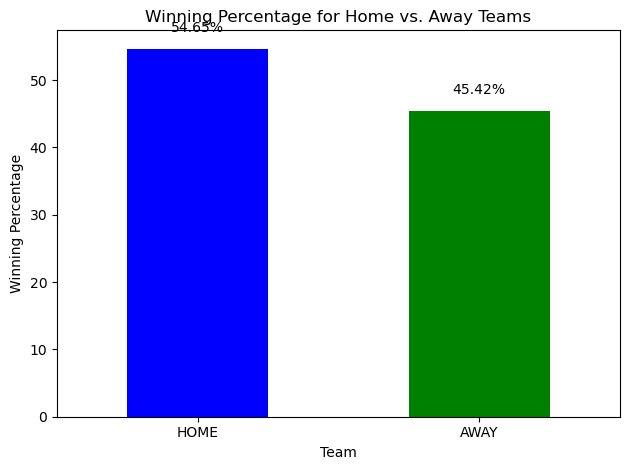

In [126]:
# Step 1: Calculate the winning percentage
merged_df['won'] = merged_df['won'].astype(int)
winning_percentage_df = merged_df.groupby('home_or_away')['won'].mean() * 100

# Step 2: Create a bar graph with 'HOME' on the left and show values
fig, ax = plt.subplots()
winning_percentage_df = winning_percentage_df.reindex(['HOME', 'AWAY'])
winning_percentage_df.plot(kind='bar', ax=ax, color=['blue', 'green'])

# Annotate the bar plot with values
for i, v in enumerate(winning_percentage_df):
    ax.text(i, v + 2, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Winning Percentage for Home vs. Away Teams')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=0)

# Display the plot

plt.show()

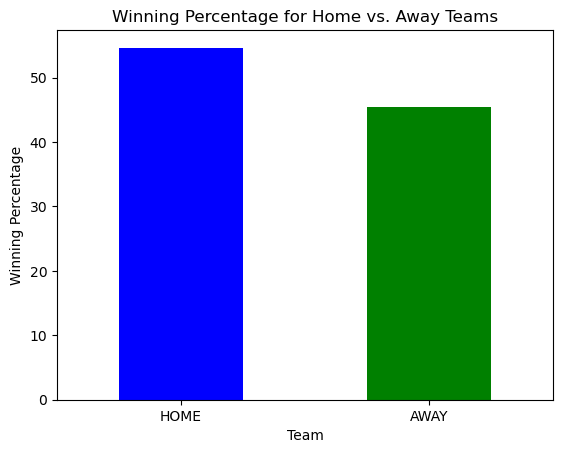

In [129]:
# Step 1: Calculate the winning percentage
# Assuming 'won' column contains boolean values, you can convert them to 0 or 1.
merged_df['won'] = merged_df['won'].astype(int)

# Group by 'home_or_away' and calculate the winning percentage
winning_percentage_df = merged_df.groupby('home_or_away')['won'].mean() * 100

# Step 2: Create a bar graph
fig, ax = plt.subplots()
winning_percentage_df = winning_percentage_df.reindex(['HOME', 'AWAY'])
winning_percentage_df.plot(kind='bar', ax=ax, color=['blue', 'green'])

# Customize the plot
plt.title('Winning Percentage for Home vs. Away Teams')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated

# Display the plot
plt.show()


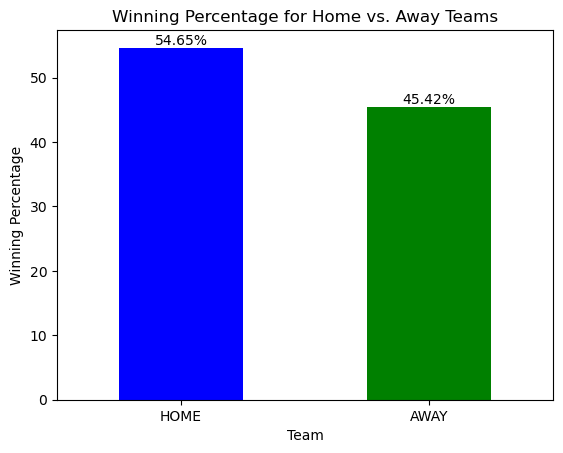

In [133]:
# Step 1: Calculate the winning percentage
merged_df['won'] = merged_df['won'].astype(int)
winning_percentage_df = merged_df.groupby('home_or_away')['won'].mean() * 100

# Step 2: Create a bar graph with 'HOME' on the left and show values above the bars
fig, ax = plt.subplots()
winning_percentage_df = winning_percentage_df.reindex(['HOME', 'AWAY'])
bars = winning_percentage_df.plot(kind='bar', ax=ax, color=['blue', 'green'])

# Annotate the bar plot with values above the bars
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Winning Percentage for Home vs. Away Teams')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=0)

# Display the plot
plt.show()


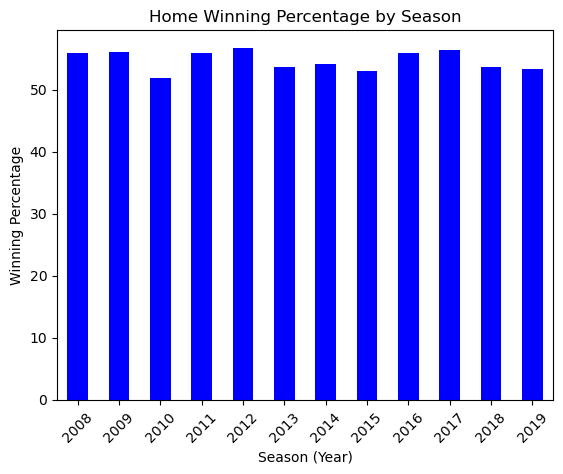

In [134]:
# Step 1: Calculate the home winning percentage by season
merged_df['won'] = merged_df['won'].astype(int)
home_winning_percentage_by_season = merged_df[merged_df['home_or_away'] == 'HOME'].groupby('season')['won'].mean() * 100

# Step 2: Create a bar graph with years on the x-axis
fig, ax = plt.subplots()
home_winning_percentage_by_season.plot(kind='bar', ax=ax, color='blue')

# Customize the plot
plt.title('Home Winning Percentage by Season')
plt.xlabel('Season (Year)')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the plot
plt.show()

In [235]:
merged_df.head()

,team_x,season,gameId,opposingTeam,home_or_away,gameDate,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,...,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,team_id,won,goals,shots,hits,powerPlayOpportunities,powerPlayGoals
0,NYR,2008,2008020001,T.B,AWAY,20081004,0.4596,0.6408,0.6310,37.733,...,2.917,2.833,2.714,3.0,True,2.0,41.0,16.0,7.0,1.0
1,NYR,2008,2008020003,T.B,HOME,20081005,0.6619,0.6207,0.6190,34.277,...,1.091,1.117,1.091,3.0,True,2.0,39.0,10.0,4.0,1.0
2,NYR,2008,2008020010,CHI,HOME,20081010,0.4123,0.4904,0.4643,27.924,...,2.738,2.751,2.730,3.0,True,4.0,29.0,44.0,3.0,0.0
3,NYR,2008,2008020019,PHI,AWAY,20081011,0.5008,0.5000,0.4810,27.100,...,3.123,2.958,2.907,3.0,True,4.0,27.0,5.0,6.0,1.0
4,NYR,2008,2008020034,N.J,HOME,20081013,0.3114,0.4369,0.4507,21.917,...,2.698,2.691,2.242,3.0,True,4.0,24.0,37.0,4.0,2.0
